## **Problem 2**
### **Project 5.5**

In [25]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from math import floor, ceil

## **Part-A**

In [26]:
def stat_filter2d(input_img, size, perc):
    M, N = input_img.shape  
    m, n = size 
    a, b = m // 2, n // 2  
    def get_percentile(x, y):
        z = []
        for i in range(int(x - a), int(x + a + 1)):
            for j in range(int(y - b), int(y + b + 1)):
                if i >= 0 and i < M and j >= 0 and j < N:
                    z.append(input_img[i, j])
        return percentile(z, perc)
    xx, yy = np.meshgrid(range(M), range(N), indexing='ij')
    vf = np.vectorize(get_percentile)
    return vf(xx, yy)

In [27]:
def percentile(arr, p):
    idx = p / 100.0 * (len(arr) - 1)
    sorted_arr = sorted(arr)
    below, above = int(floor(idx)), int(ceil(idx))
    return (sorted_arr[below] + sorted_arr[above]) / 2.0

In [42]:
def img_to_array(img, dtype=None):
    if img.mode == 'RGB':
        return [img_to_array(ch) for ch in img.split()]
    else:
        return np.array(img.getdata(), dtype=dtype).reshape(img.size[::-1])

In [43]:
def array_to_img(data, mode=None):
    if not mode:
        return Image.fromarray(data)
    elif mode == 'RGB':
        channels = [array_to_img(ch, 'L') for ch in data]
        return Image.merge('RGB', channels)
    else:
        return Image.fromarray(data).convert(mode)

## **Part-B**

In [30]:
def max_filter(img, size):
    data = img_to_array(img)
    result = stat_filter2d(data, size, 100)
    return array_to_img(result, img.mode)

## **Part-C**

In [31]:
def min_filter(img, size):
    data = img_to_array(img)
    result = stat_filter2d(data, size, 0)
    return array_to_img(result, img.mode)

## **Part-D**

In [32]:
def median_filter(img, size):
    data = img_to_array(img)
    result = stat_filter2d(data, size, 50)
    return array_to_img(result, img.mode)

## **Part-E**

In [33]:
img = Image.open("hubble.tif")

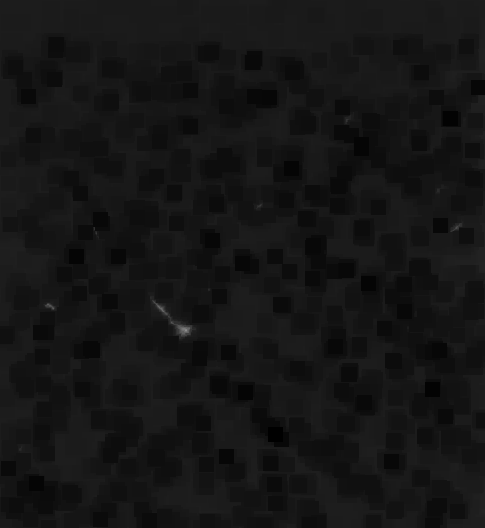

In [48]:
min_filter(img, (15, 15))

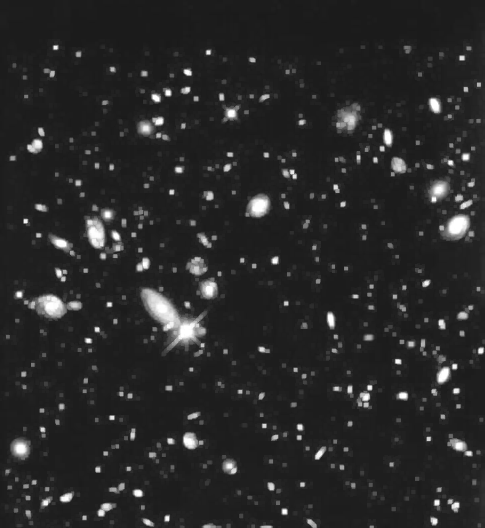

In [50]:
max_filter(img, (2, 2))

**Observation**

*From above result we can conclude that that the minimum square where the largest object remains is is of size 15,15 using min filter.*

## **Part-F**

In [38]:
img1 = Image.open("circuitboard-saltandpep.tif")

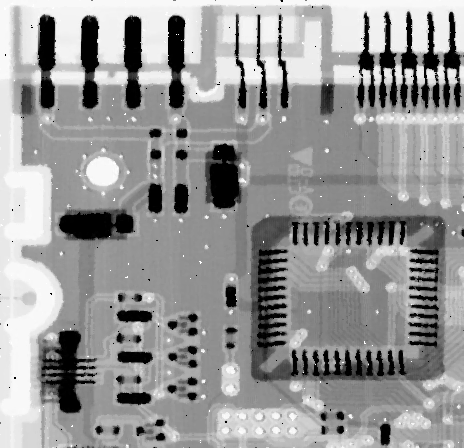

In [39]:
median_filter(img1, (3,3))

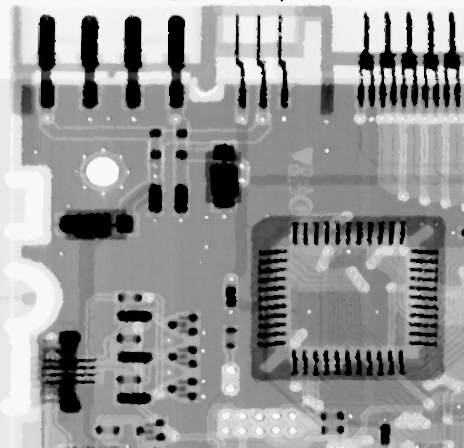

In [40]:
median_filter(median_filter(img1, (3,3)), (3,3))

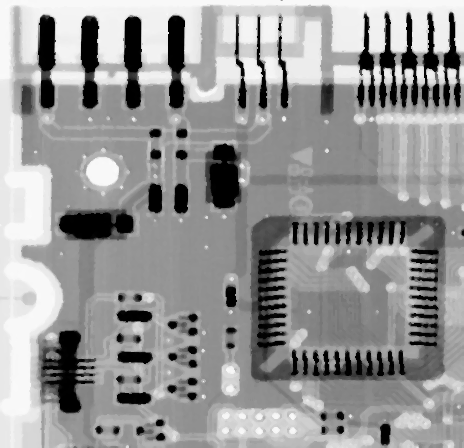

In [41]:
median_filter(median_filter(median_filter(img1, (3,3)), (3,3)), (3,3))